In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.utils import np_utils
import matplotlib.pyplot as plt
import keras

In [2]:
listening_history = pd.read_csv('../data/listening_history.csv', sep='\t')
id_tags = pd.read_csv('../data/id_tags.csv', sep='\t')
id_genres = pd.read_csv('../data/id_genres.csv', sep='\t')
id_information = pd.read_csv('../data/id_information.csv', sep='\t')
id_metadata = pd.read_csv('../data/id_metadata.csv', sep='\t')
id_lang = pd.read_csv('../data/id_lang.csv', sep='\t')

# Data analysis of Music4All dataset

### listening_history.csv:
    The listening history for each user in the database. There are three attributes in this file: user, song and timestamp.

In [3]:
listening_history.head()

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09


### id_tags.csv:
    This file contains the id for each song and the tags associated with it. The sets of tags are separated by a comma.

In [4]:
id_tags.head()

,id,tags
0,0009fFIM1eYThaPg,"pop,british,female vocalists,dance,cheryl cole"
1,0010xmHR6UICBOYT,"instrumental hip-hop,underground hip hop,instr..."
2,002Jyd0vN4HyCpqL,"hard rock,rock,classic rock,american artist"
3,006TYKNjNxWjfKjy,"symphonic metal,power metal,symphonic power metal"
4,007LIJOPQ4Sb98qV,"post-punk,new wave,1985"


### id_genres.csv:
    This file contains the id for each song and the genres associated with it. The genres are separated by a comma.

In [5]:
id_genres.head()

,id,genres
0,0009fFIM1eYThaPg,pop
1,0010xmHR6UICBOYT,underground hip hop
2,002Jyd0vN4HyCpqL,"hard rock,rock,classic rock"
3,006TYKNjNxWjfKjy,"symphonic metal,power metal,symphonic power metal"
4,007LIJOPQ4Sb98qV,"post-punk,new wave"


### id_information.csv:
    This file contains the id of the song along with basic information about it, namely artist, song name and album name.

In [6]:
id_information.head()

,id,artist,song,album_name
0,0009fFIM1eYThaPg,Cheryl,Rain on Me,3 Words
1,0010xmHR6UICBOYT,Oddisee,After Thoughts,The Beauty in All
2,002Jyd0vN4HyCpqL,Blue Öyster Cult,ME 262,Secret Treaties
3,006TYKNjNxWjfKjy,Rhapsody,Flames of Revenge,Legendary Years (Re-Recorded)
4,007LIJOPQ4Sb98qV,The Chameleons,Nostalgia,What Does Anything Mean? Basically (2009 Remas...


### id_metadata.csv:
    This file contains the id of the song and its attributes obtained through the Spotify official API, including their Spotify id.

In [7]:
id_metadata.head()

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
0,0009fFIM1eYThaPg,3eObKIfHKJ1nAPh0wTxFCc,12.0,2009,0.635,0.746,6.0,1.0,0.548,110.973,229947
1,0010xmHR6UICBOYT,27szvF97Tu95GxN98N52fy,46.0,2013,0.591,0.513,7.0,0.0,0.263,172.208,325096
2,002Jyd0vN4HyCpqL,273lBFpxUCwisTpdnF9cVb,31.0,1974,0.319,0.925,2.0,1.0,0.658,157.630,285693
3,006TYKNjNxWjfKjy,1qZgergQ41vaD4zBf3AKXR,33.0,2017,0.432,0.979,7.0,1.0,0.162,90.008,332867
4,007LIJOPQ4Sb98qV,6rVxJ3sN3Cz40MSLavbG1K,19.0,2009,0.357,0.708,9.0,1.0,0.470,123.904,326067


### id_lang.csv:
    This file contains the id of the song and the language of the lyrics.

In [8]:
id_lang.head()

,id,lang
0,0009fFIM1eYThaPg,en
1,0010xmHR6UICBOYT,en
2,002Jyd0vN4HyCpqL,en
3,006TYKNjNxWjfKjy,en
4,007LIJOPQ4Sb98qV,en


# listening_history.csv
5 109 592 records:
- 14 127 unique users
- 99 596 unique songs
- 122 340 unique timestamps

In [9]:
listening_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109592 entries, 0 to 5109591
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user       object
 1   song       object
 2   timestamp  object
dtypes: object(3)
memory usage: 116.9+ MB


In [10]:
listening_history.dtypes

user         object
song         object
timestamp    object
dtype: object

In [11]:
listening_history.describe()

,user,song,timestamp
count,5109592,5109592,5109592
unique,14127,99596,122340
top,user_N9OKtRH0,32m5suoC94ytD8Ed,2019-02-08 20:35
freq,500,82871,175


In [12]:
listening_history.head()

,user,song,timestamp
0,user_007XIjOr,DaTQ53TUmfP93FSr,2019-02-20 12:28
1,user_007XIjOr,dGeyvi5WCOjDU7da,2019-02-20 12:35
2,user_007XIjOr,qUm54NYOjeFhmKYx,2019-02-20 12:48
3,user_007XIjOr,FtnuMT1DlevSR2n5,2019-02-20 12:52
4,user_007XIjOr,LHETTZcSZLeaVOGh,2019-02-20 13:09


In [13]:
listening_history.tail()

,user,song,timestamp
5109587,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 15:57
5109588,user_zzWscYTy,5ZHgff3sjETIiedr,2019-01-10 16:21
5109589,user_zzWscYTy,m4O1iLh6fC43xjRy,2019-01-10 16:48
5109590,user_zzWscYTy,mvUaP8k67qOFfA65,2019-01-10 21:13
5109591,user_zzWscYTy,BBiswLufo26YQCT7,2019-01-10 21:16


In [14]:
listening_history.isnull().sum()

user         0
song         0
timestamp    0
dtype: int64

## Date range
Date *from* **2013-12-30 22:42** *to* **2019-03-26 11:57**

In [15]:
listening_history_by_timestamp_asc = listening_history.sort_values(by='timestamp')

In [16]:
listening_history_by_timestamp_asc.head(1)

,user,song,timestamp
1331567,user_Fq3E54HF,tzpXiIYf6EeS89Ws,2013-12-30 22:42


In [17]:
listening_history_by_timestamp_asc.tail(1)

,user,song,timestamp
4636367,user_u4aT6q6m,ZCXukVDuFnyzOeuP,2019-03-26 11:57


## The most played songs by users

In [18]:
listening_history.song.value_counts()

32m5suoC94ytD8Ed    82871
YwURIu6eZDCJyuEf    33737
vkOg9ZAiUgUT87k6    30719
7Gsb7yKtAJNCvWez    27880
KKmk2QJLVj2Aqsjg    25640
                    ...  
PPc87NauCUbIkPWN        1
D2WHFtLqbsJF22hW        1
8ijHH2lE89Z0sWgV        1
l5x0RHb9W4nwjTk2        1
Nv44mPsz174VuZ7Q        1
Name: song, Length: 99596, dtype: int64

### The most played song information

In [19]:
id_information.loc[id_information['id'] == '2hFOVHrJ1IVSvCPj']

,id,artist,song,album_name
4836,2hFOVHrJ1IVSvCPj,Middle Kids,Never Start,Middle Kids EP


In [20]:
id_tags.loc[id_tags['id'] == '32m5suoC94ytD8Ed']

,id,tags
5460,32m5suoC94ytD8Ed,"trap,rap,pop,rnb"


In [21]:
id_genres.loc[id_genres['id'] == '32m5suoC94ytD8Ed']

,id,genres
5460,32m5suoC94ytD8Ed,"rap,pop"


In [22]:
id_metadata.loc[id_metadata['id'] == '32m5suoC94ytD8Ed']

,id,spotify_id,popularity,release,danceability,energy,key,mode,valence,tempo,duration_ms
5460,32m5suoC94ytD8Ed,6ocbgoVGwYJhOv1GgI9NsF,88.0,2019,0.778,0.317,1.0,0.0,0.327,140.048,178627


In [23]:
id_lang.loc[id_lang['id'] == '32m5suoC94ytD8Ed']

,id,lang
5460,32m5suoC94ytD8Ed,en


## Users with the most songs played

In [24]:
listening_history.user.value_counts()

user_N9OKtRH0    500
user_JuUy0Pi6    500
user_Q8VSlThn    500
user_NAE2bHHI    500
user_Vrd41io2    500
                ... 
user_8EtNkBPW     13
user_KSotRo4O     11
user_wDUNVLHd      8
user_M2G5DnkG      4
user_4e4K55C0      3
Name: user, Length: 14127, dtype: int64

In [25]:
listening_history.loc[listening_history['user'] == 'user_N9OKtRH0'].groupby('song').count()

,user,timestamp
song,,
28x5L80PQrU2SzWC,436,436
5RxsEogLBdXW2U8v,5,5
5stZqMOVZDKmzPt5,6,6
6PTU0EEwfcdwK9r6,5,5
DNxXlUUNqX4saEBc,5,5
EQeRaQuzupJSeJYX,5,5
GzacORlsoC9wIvKs,5,5
KKmk2QJLVj2Aqsjg,1,1
KnMItrBYhHFixzJT,5,5


In [26]:
id_information.loc[id_information['id'] == '28x5L80PQrU2SzWC']

,id,artist,song,album_name
3853,28x5L80PQrU2SzWC,Spice Girls,Say You'll Be There,Spice


## Songs characteristics

In [27]:
id_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109269 entries, 0 to 109268
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            109269 non-null  object 
 1   spotify_id    109269 non-null  object 
 2   popularity    109269 non-null  float64
 3   release       109269 non-null  int64  
 4   danceability  109269 non-null  float64
 5   energy        109269 non-null  float64
 6   key           109269 non-null  float64
 7   mode          109269 non-null  float64
 8   valence       109269 non-null  float64
 9   tempo         109269 non-null  float64
 10  duration_ms   109269 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 9.2+ MB


In [28]:
id_metadata.groupby('tempo').size()
# id_metadata.groupby('tempo').size().plot(kind='bar', title='Songs by years',
#                                            ylabel='size', xlabel='year', figsize=(25, 10))

tempo
0.000      18
32.528      1
33.000      1
34.427      1
35.202      1
           ..
220.356     1
221.112     1
221.947     1
226.130     1
242.903     1
Length: 55988, dtype: int64

<Axes: title={'center': 'Songs by years'}, xlabel='year', ylabel='size'>

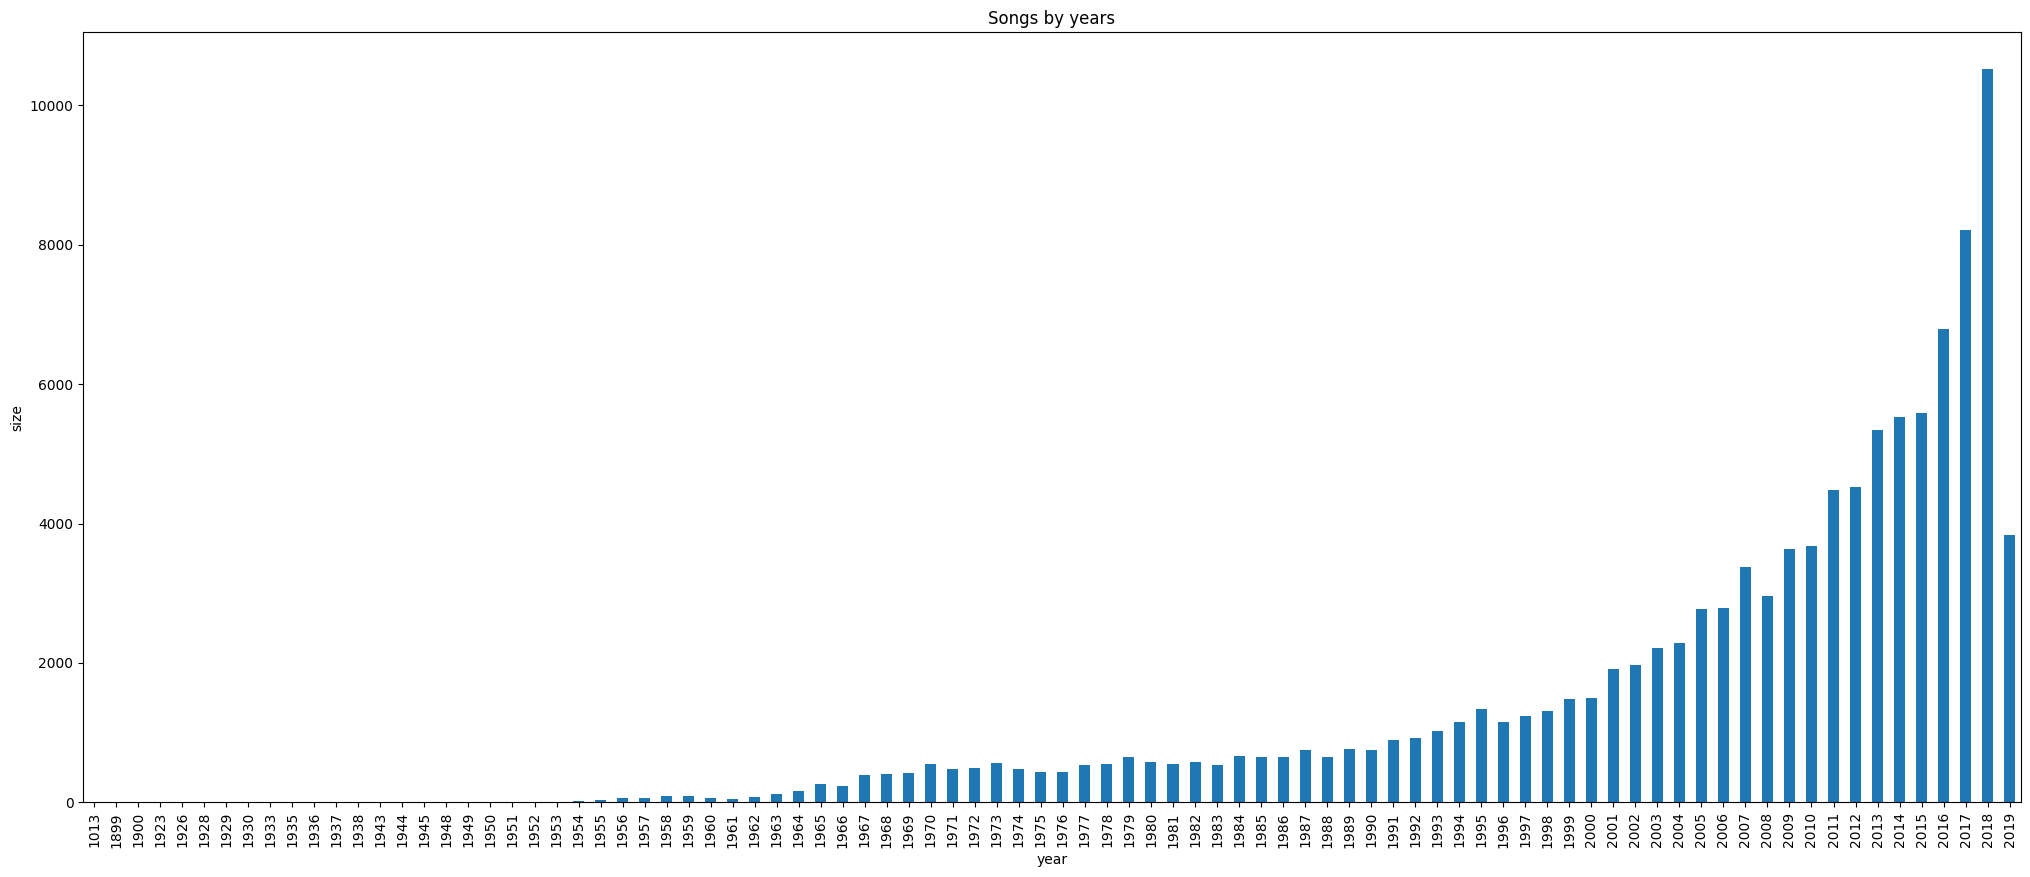

In [29]:
id_metadata.groupby('release').size().plot(kind='bar', title='Songs by years',
                                           ylabel='size', xlabel='year', figsize=(25, 10))

<Axes: title={'center': 'Songs by popularity'}, xlabel='popularity', ylabel='size'>

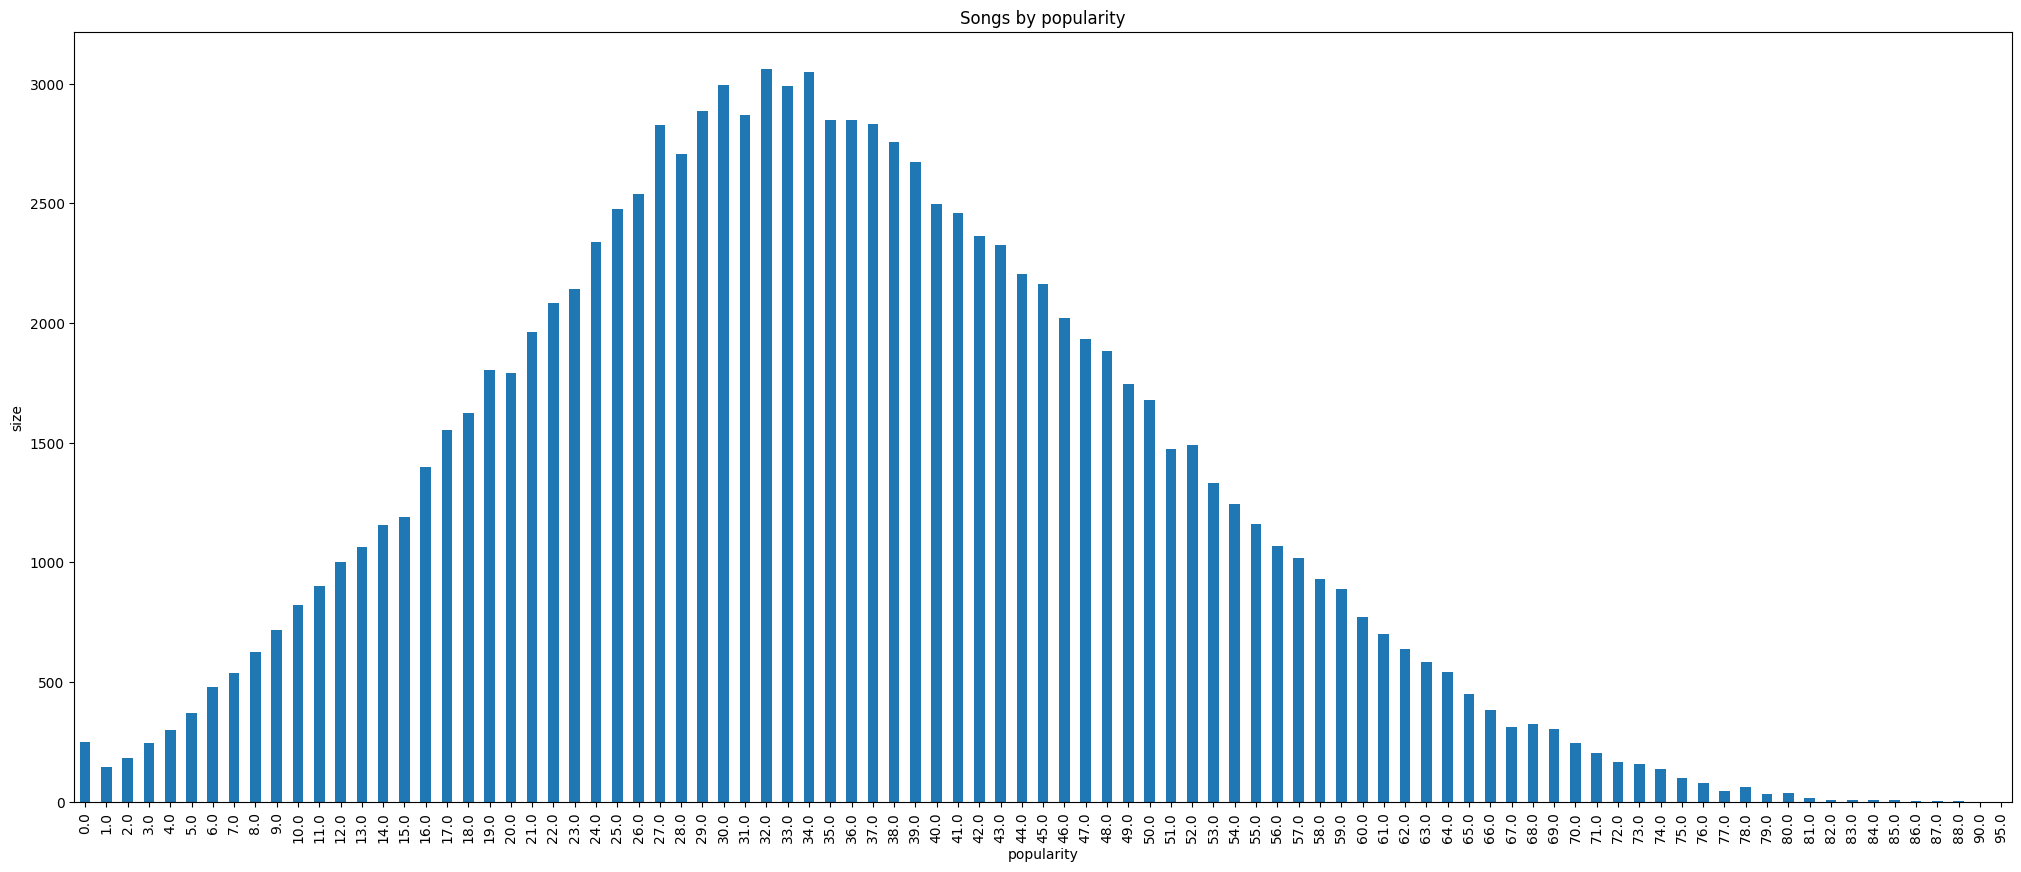

In [30]:
id_metadata.groupby('popularity').size().plot(kind='bar', title='Songs by popularity',
                                           ylabel='size', xlabel='popularity', figsize=(25, 10))

### Average values by years

C:\Users\olko\AppData\Local\Temp\ipykernel_13224\2740829915.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_values_by_years = id_metadata.groupby('release').mean().reset_index()


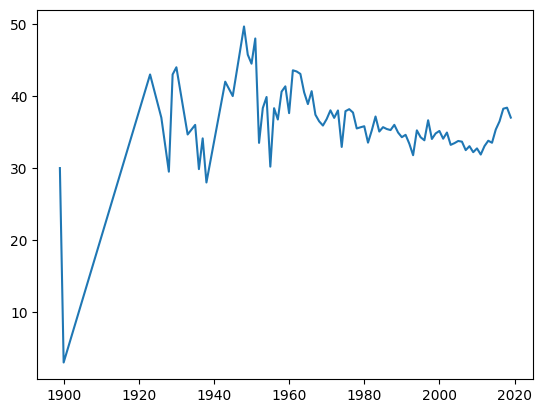

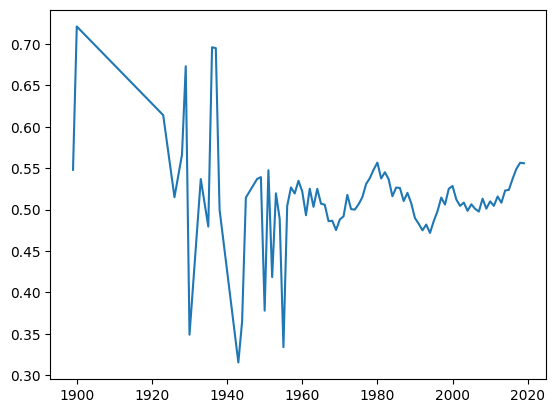

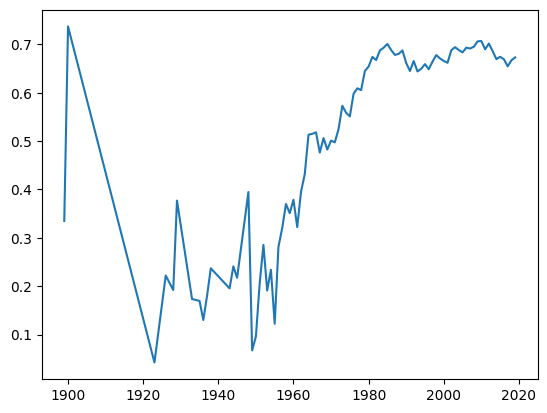

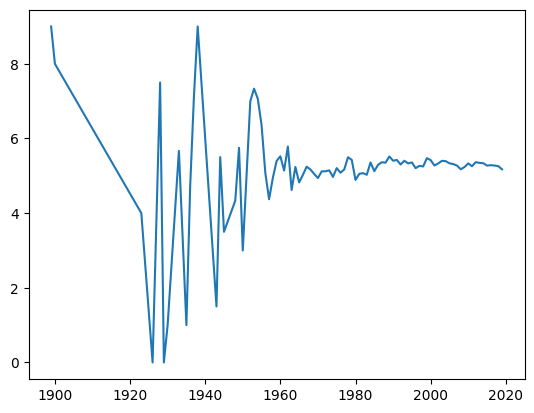

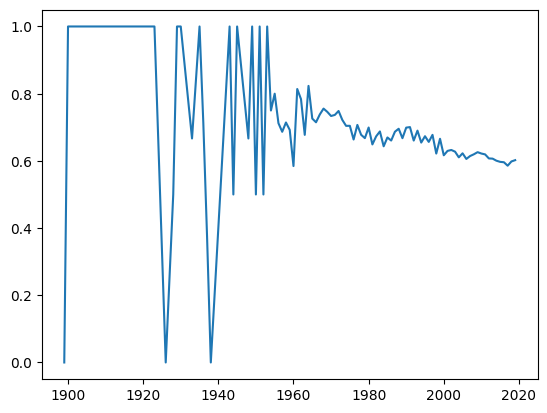

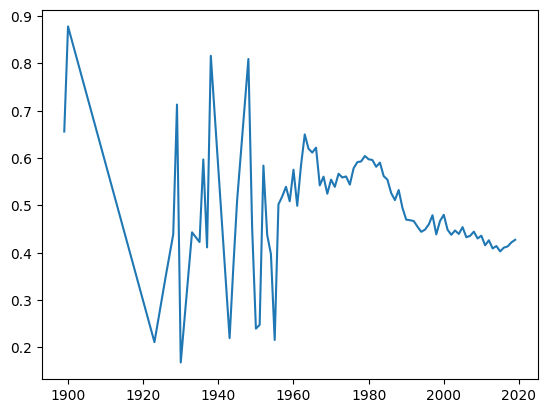

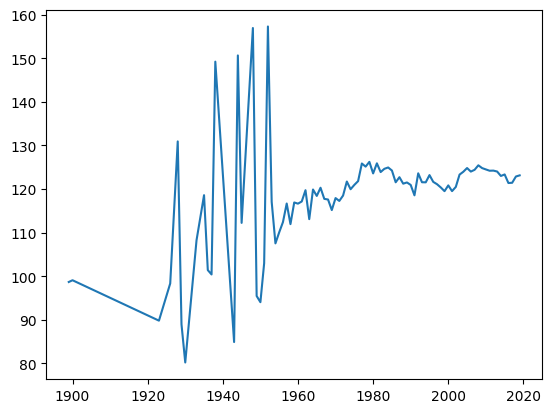

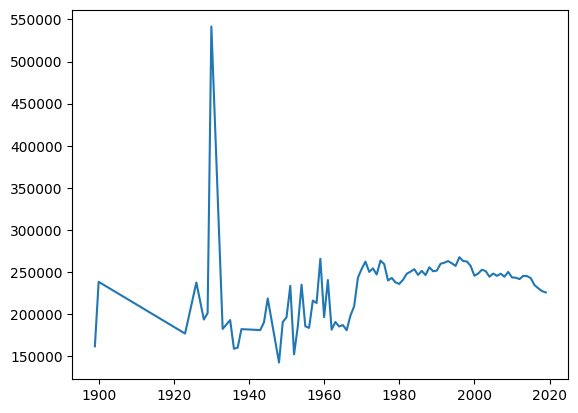

In [31]:
sound_features = ['popularity', 'danceability', 'energy', 'key', 'mode', 'valence', 'tempo', 'duration_ms']
mean_values_by_years = id_metadata.groupby('release').mean().reset_index()
mean_values_by_years.where(mean_values_by_years["release"] > 1800, inplace = True)

for column in sound_features:
    fig = plt.plot(mean_values_by_years['release'], mean_values_by_years[column])
    plt.show()

In [32]:
listening_history.head(10000).to_csv("listening_history_reduced.csv")